## Aufgabe 2 — Abtastung und Quantisierung

[[1.01730282 1.01725195 1.01709937 ... 0.90660795 0.90222154 0.89776658]
 [1.01730282 1.01725195 1.01709937 ... 0.90660795 0.90222154 0.89776658]
 [1.01730282 1.01725195 1.01709937 ... 0.90660795 0.90222154 0.89776658]
 ...
 [1.01730282 1.01725195 1.01709937 ... 0.90660795 0.90222154 0.89776658]
 [1.01730282 1.01725195 1.01709937 ... 0.90660795 0.90222154 0.89776658]
 [1.01730282 1.01725195 1.01709937 ... 0.90660795 0.90222154 0.89776658]]
[1.0173028150236534, 1.0172519511545093, 1.0170993748053485, 1.0168451317433542, 1.0164892982217426, 1.0160319809416483, 1.0154733169987977, 1.014813473815015, 1.0140526490546025, 1.013191070525655, 1.0122289960663802, 1.0111667134164986, 1.0100045400738231, 1.0087428231361029, 1.0073819391282586, 1.0059222938151169, 1.004364321999779, 1.0027084873077678, 1.0009552819570935, 0.9991052265144088, 0.9971588696374125, 0.9951167878036894, 0.9929795850261655, 0.9907478925553814, 0.988422368568786, 0.9860036978472656, 0.983492591439131, 0.9808897863117941, 

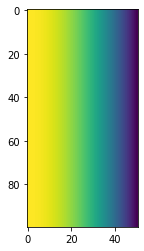

In [60]:
import math
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

def gaussian_function(x: int, y = 0.0, o = 1.0) -> float:

    const = 1 / (math.sqrt(2 * math.pi * o ** 2))
    val = const * math.exp(-(((x - y)**2) / (2 * o ** 2)))

    if val < -5: return -5
    if val >  5: return  5

    return val

row = [gaussian_function(x) * 0xff for x in range(0, 51)]
rows = row * 100
matrix = np.array(rows)
matrix = matrix.reshape((100, 51))
matrix = np.clip(matrix, a_min = 0, a_max = 0xff)

plt.figure()
plt.imshow(matrix)

print(matrix)
print(row)
print(len(row))

## Aufgabe 5 — Rauschen

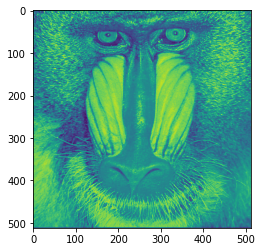

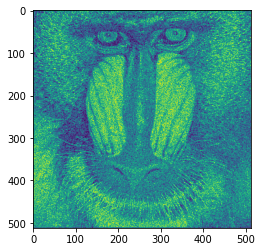

In [43]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

def gaussian_noise(image: np.ndarray, standard_deviation = 50):

    mean = 0
    noise = np.random.normal(mean, standard_deviation, image.shape)

    noise_image = image + np.array(noise)
    noise_image = np.clip(noise_image, a_min = 0, a_max = 0xff)

    plt.figure()
    plt.imshow(image)

    plt.figure()
    plt.imshow(noise_image)


mandrill = skimage.io.imread("mandrill.png")
gaussian_noise(mandrill)

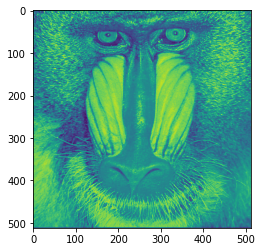

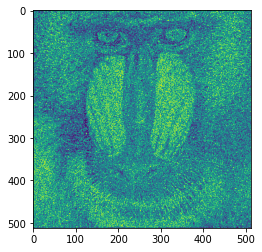

In [46]:
def salt_and_pepper_noise(image: np.ndarray, probability = 0.3):

    noise = np.random.choice(3, image.shape, p=[1 - probability, probability / 2, probability / 2])
    noise = np.where(noise==1,  0xff, noise)
    noise = np.where(noise==2, -0xff, noise)

    noise_image = image + noise
    noise_image = np.clip(noise_image, a_min = 0, a_max = 0xff)

    plt.figure()
    plt.imshow(image)

    plt.figure()
    plt.imshow(noise_image)


mandrill = skimage.io.imread("mandrill.png")
salt_and_pepper_noise(mandrill)


**Beschreibt kurz, welche Auswirkungen die Veränderung der jeweiligen Parameter der beiden Funktionen
(Standardabweichung bzw. Wahrscheinlichkeit für eine Veränderung) auf das Ergebnis hat.**

Je höher die Wahrscheinlichkeit ist desso höher ist das Rauschen im Bild.
Sest man bei salt_and_pepper_noise die probability 1 ist garnichts mehr zu erkennen.

